# Installations & Imports

In [ ]:
!pip install -qq opentelemetry-api opentelemetry-sdk openinference-semantic-conventions openinference-instrumentation-openai opentelemetry-exporter-otlp arize-otel==0.7.1 openai

In [ ]:
import os
from getpass import getpass

from openai import OpenAI
from openinference.instrumentation.openai import OpenAIInstrumentor
from openinference.instrumentation import using_prompt_template
from arize.otel import register

# Set Up API Keys and Register OTEL

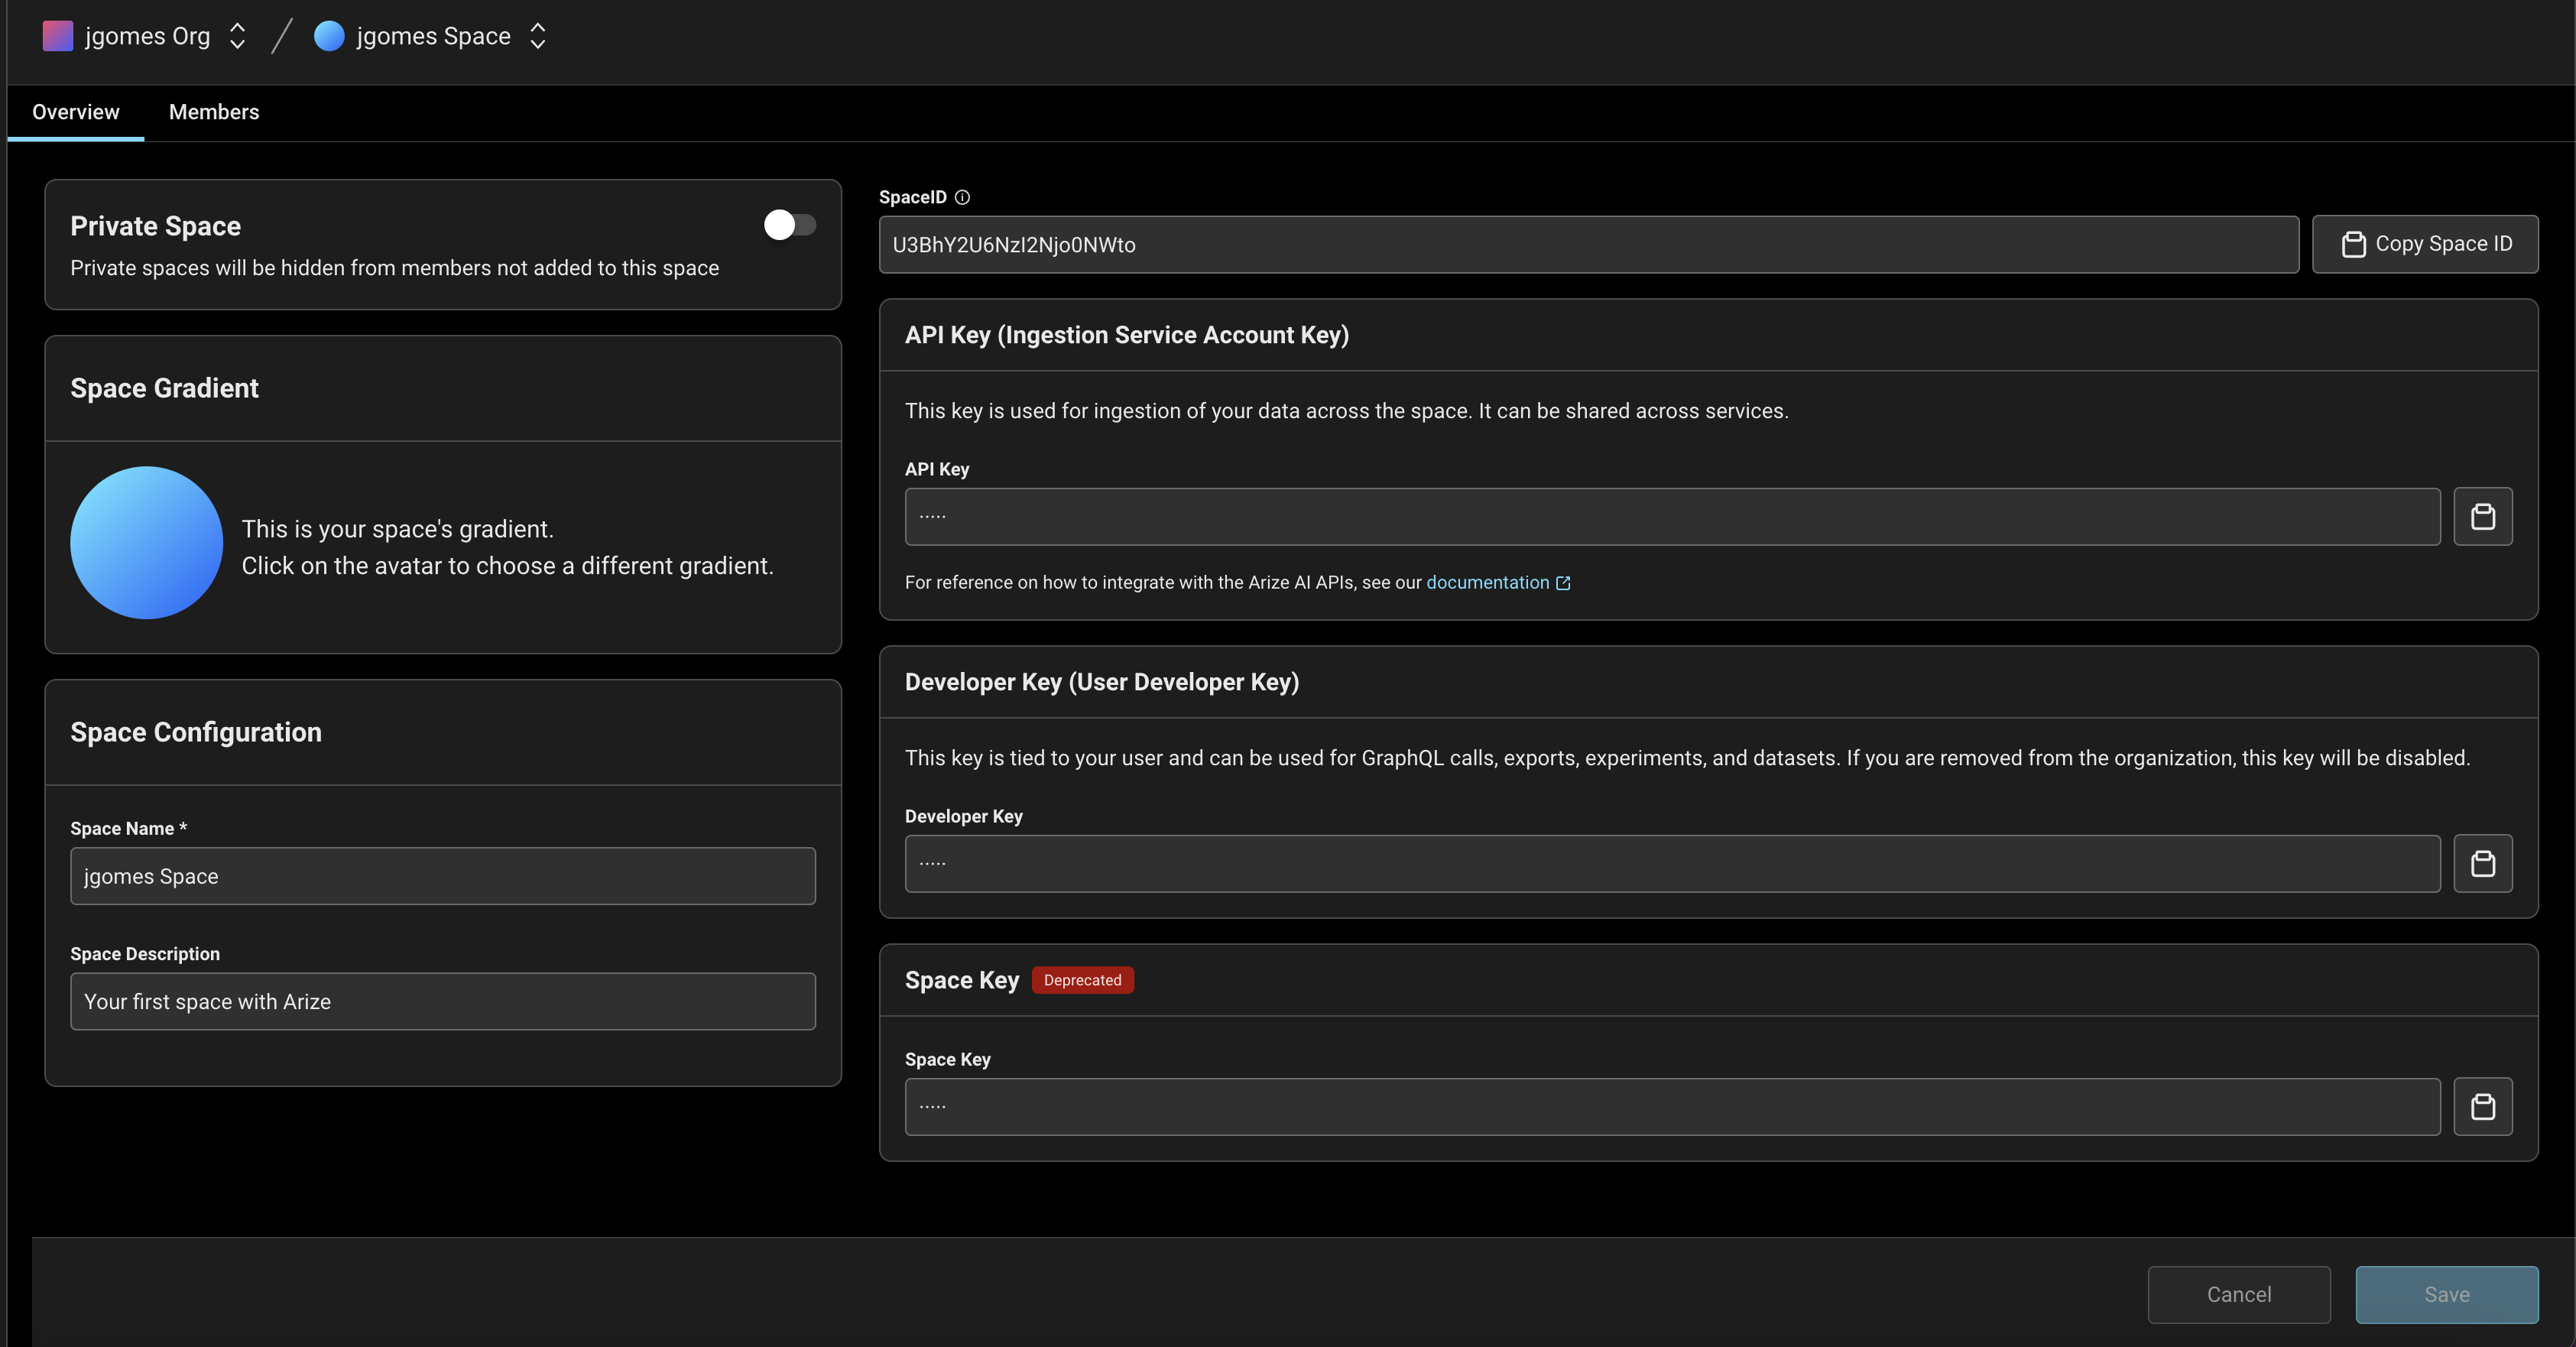

In [ ]:
project_name = "my_first_arize_project"

# Setup OTEL via our convenience function.
tracer_provider = register(
    space_id=getpass("Enter your Arize Space ID: "),
    api_key=getpass("Enter your Arize API Key: "),
    project_name=project_name,
)

# Instrumentation

In [ ]:
# Because we are using Open AI, we will use this along with our custom instrumentation
OpenAIInstrumentor().instrument(tracer_provider=tracer_provider)

# Call Open AI Chat Completion & Instrument Template Vars

In [ ]:
os.environ["OPENAI_API_KEY"] = getpass("Enter your Open AI API key: ")
client = OpenAI()

prompt_template = "Please describe the weather forecast for {city} on {date}"
prompt_template_variables = {"city": "Johannesburg", "date": "July 11"}
with using_prompt_template(
    template=prompt_template,
    variables=prompt_template_variables,
    version="v1.0",
):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": prompt_template.format(**prompt_template_variables),
            },
        ],
    )
    print(response)

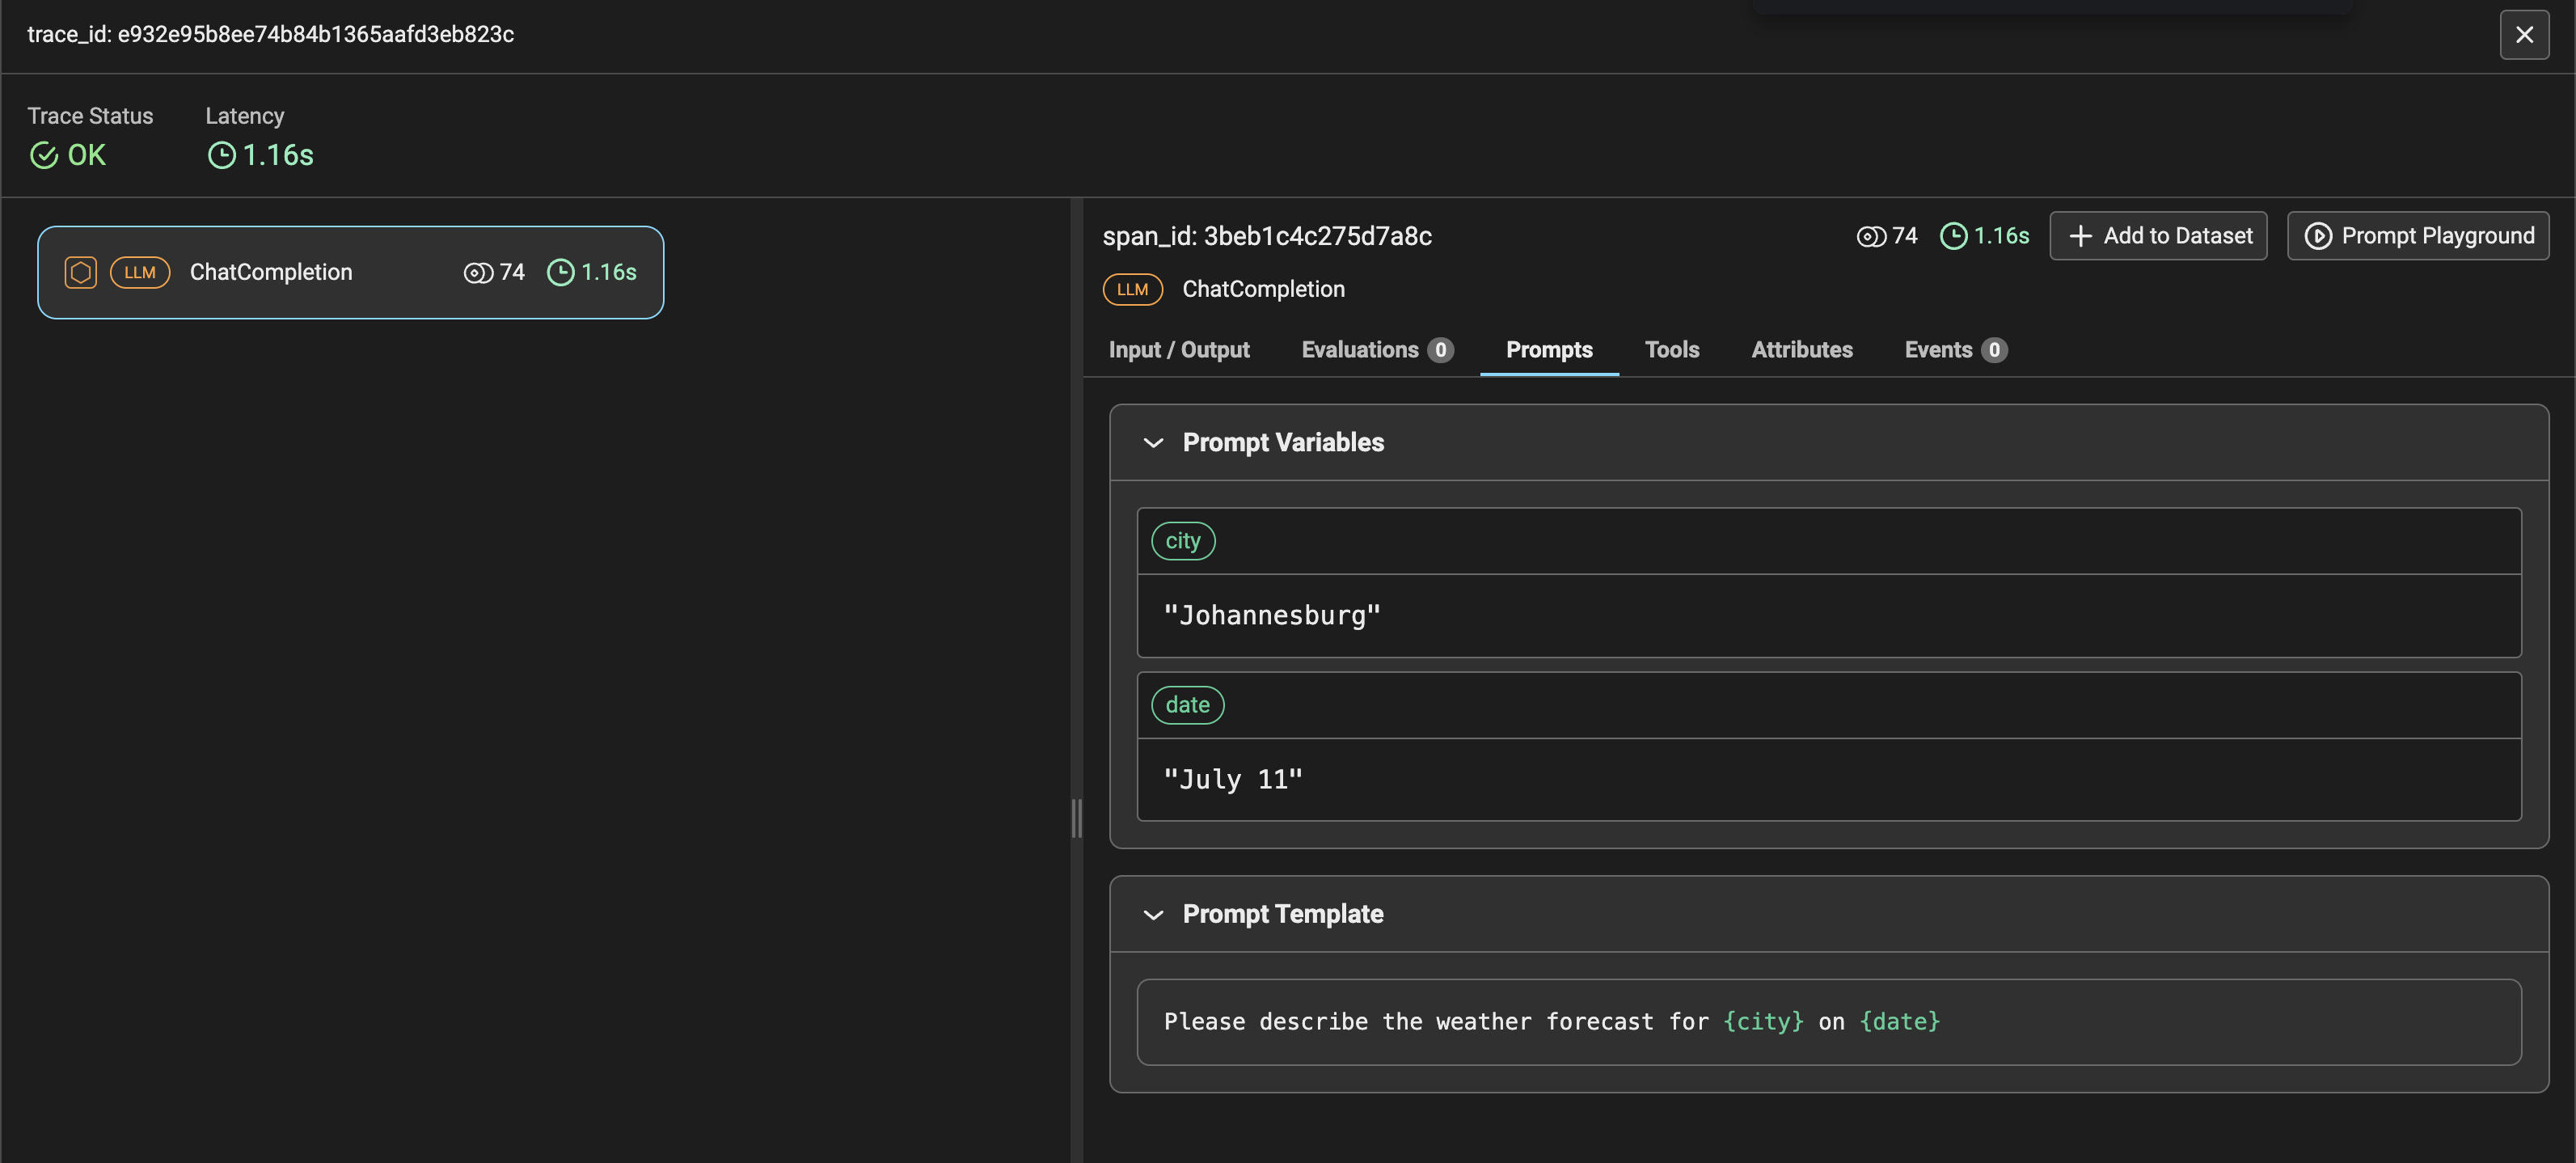

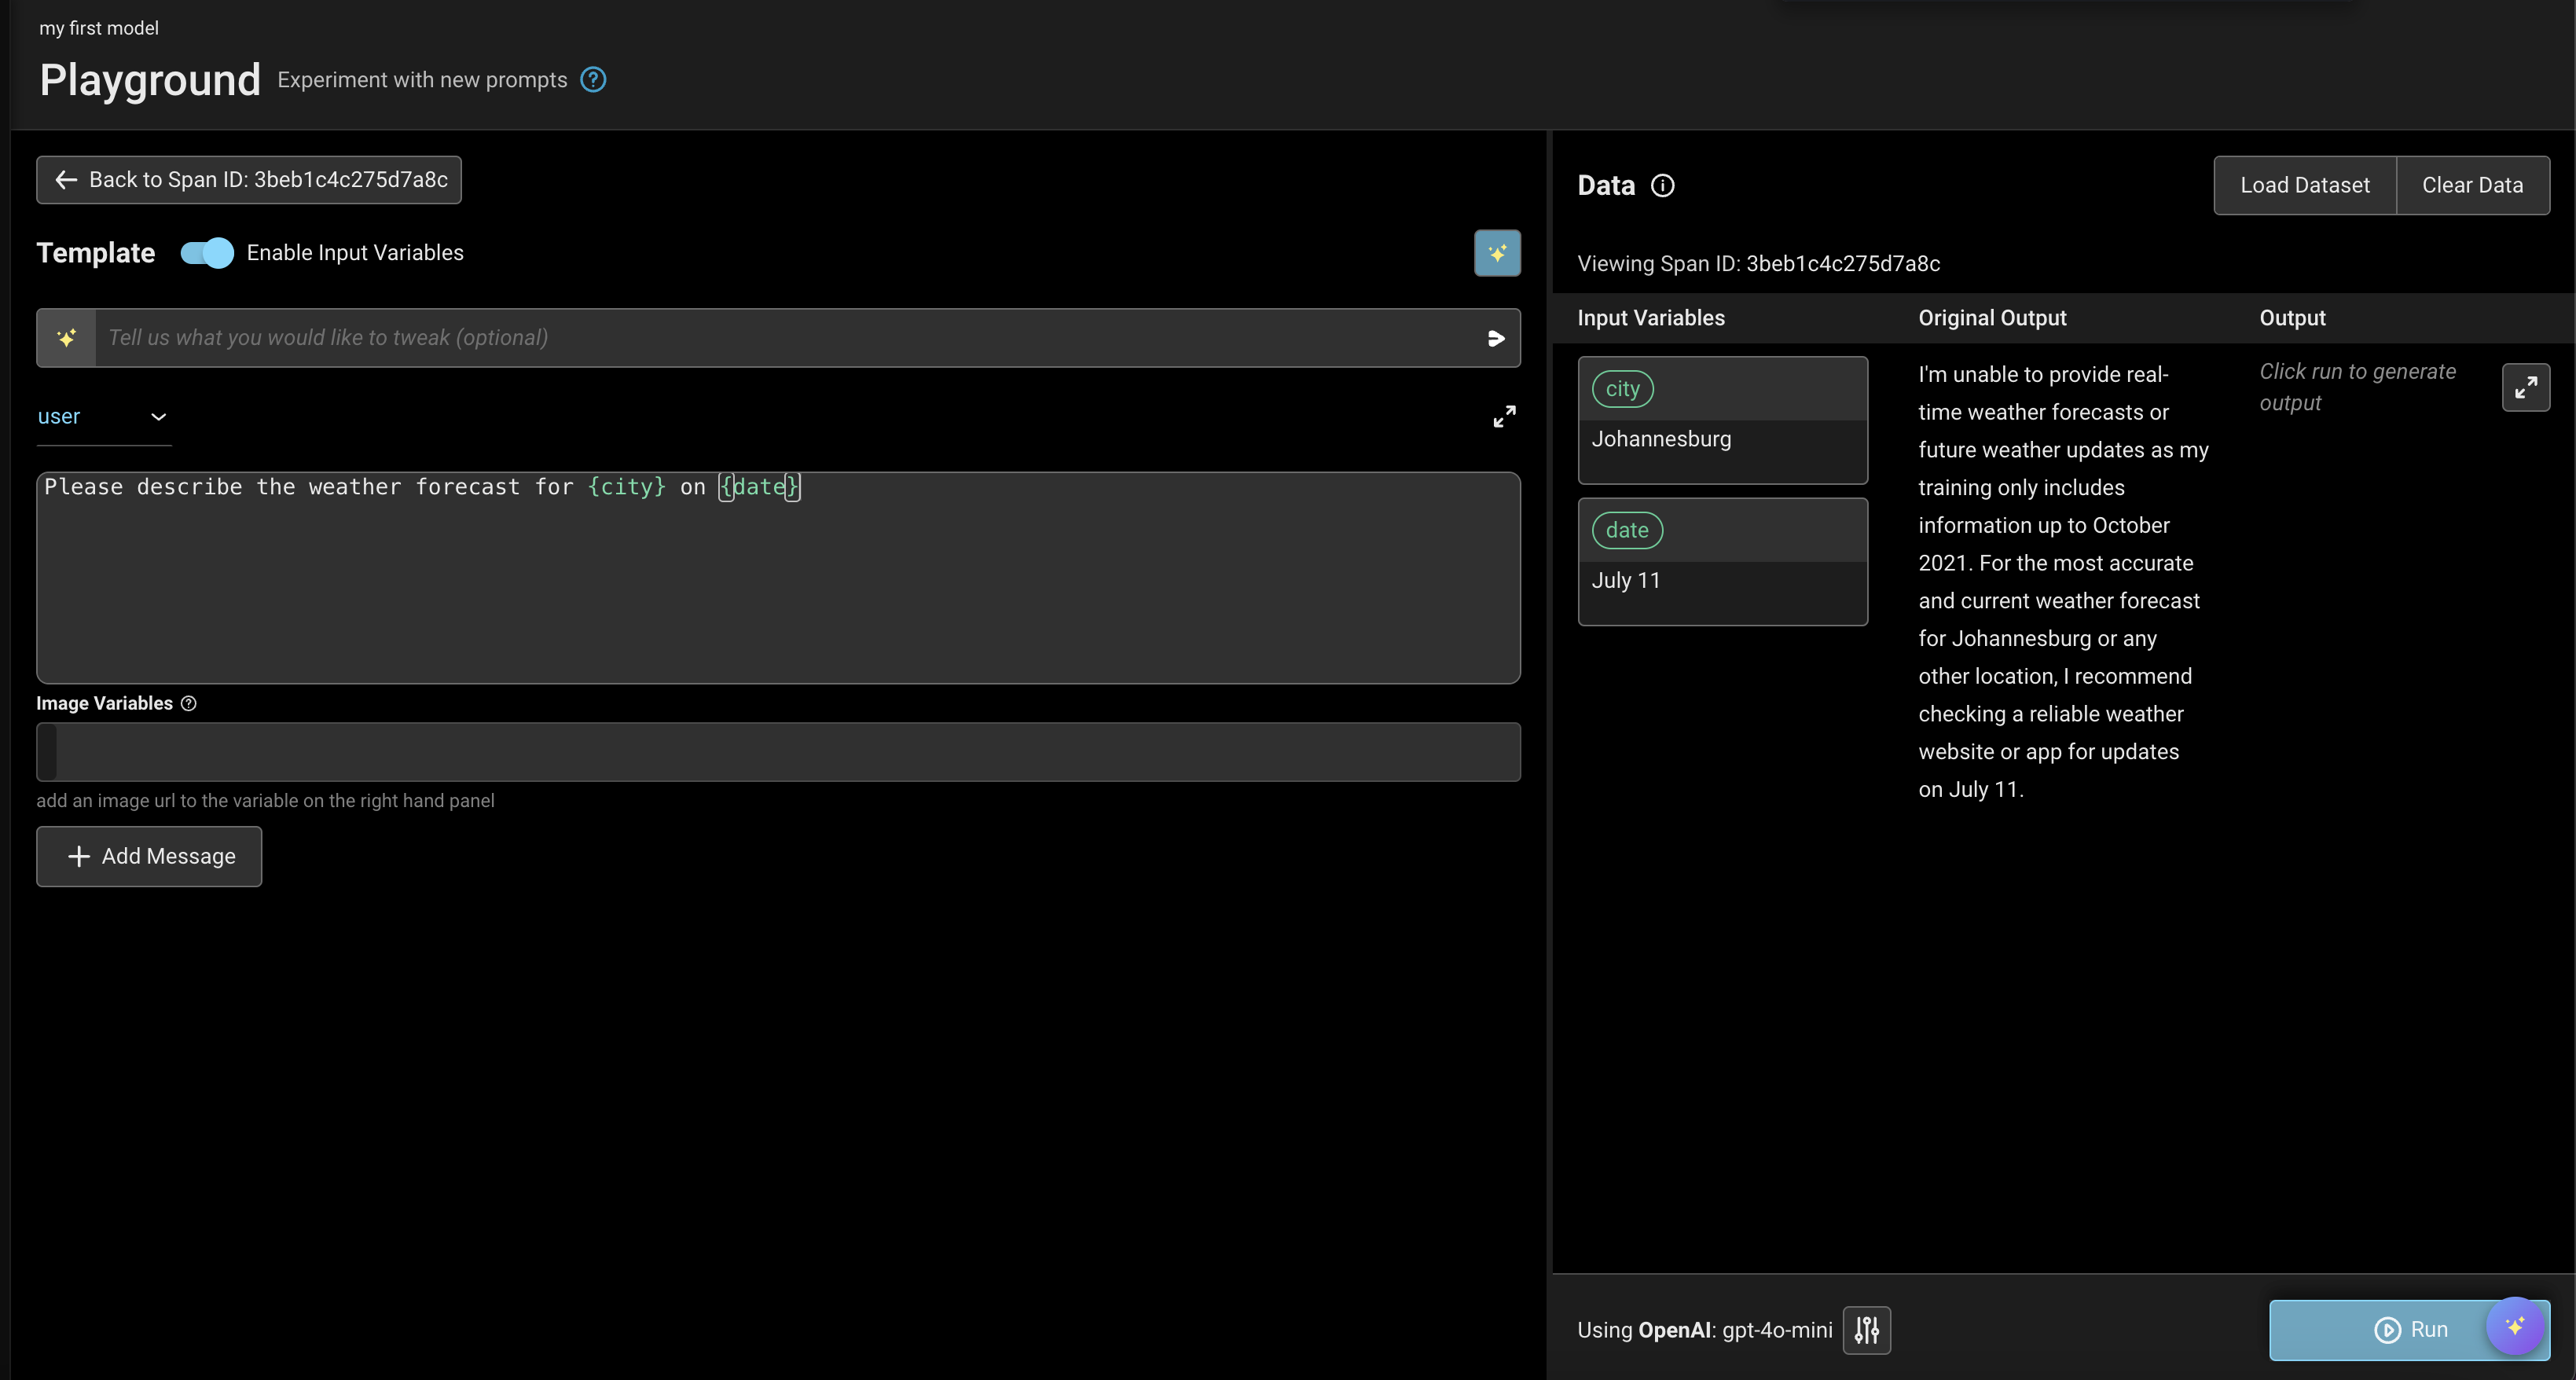